# Access a high-dimensional field by indexing integers vectors
Ref: Yuanming Hu, Taichi Cookbook 001, 27.07.22

In [ ]:
import taichi as ti
import matplotlib.pyplot as plt
import math as m

[Taichi] version 1.7.3, llvm 15.0.4, commit 5ec301be, linux, python 3.12.9


[I 05/26/25 15:12:22.128 20685] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


In [2]:
ti.init (arch=ti.cpu)

[Taichi] Starting on arch=x64


In [3]:
n = 512
img           = ti.field(dtype=ti.f32, shape=(n, n))
img_magnified = ti.field(dtype=ti.f32, shape=(n, n))

It can be cumbersome to use `val[i, j, k, l]` to access an element in a high-dimensional field. Is there an easier way to do that?

R: Well, we can index an integer vector directly by using `ti.ndrange(i,j,k,l)`, e.g.:

In [4]:
for I in ti.ndrange(2, 3):
    print(I)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)


R: Alternatively, we can simply do `ti.group(ti.ndrange(i,j,k,l))` (see documentation)

In [6]:
help(ti.grouped)

Help on function grouped in module taichi.lang.impl:

grouped(x)
    Groups the indices in the iterator returned by `ndrange()` into a 1-D vector.

    This is often used when you want to iterate over all indices returned by `ndrange()`
    in one `for` loop and a single index.

    Args:
        x (:func:`~taichi.ndrange`): an iterator object returned by `ti.ndrange`.

    Example::
        >>> # without ti.grouped
        >>> for I in ti.ndrange(2, 3):
        >>>     print(I)
        prints 0, 1, 2, 3, 4, 5

        >>> # with ti.grouped
        >>> for I in ti.grouped(ti.ndrange(2, 3)):
        >>>     print(I)
        prints [0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]



In [5]:
@ti.kernel
def indexes():
    for I in ti.grouped(ti.ndrange(2, 3)):
        print(I)

indexes()

[0, 0]
[0, 1]
[0, 2]
[1, 0]
[1, 1]
[1, 2]


R: or directly use a field and let `ti.grouped` generate an iterator directly

In [ ]:
@ti.kernel
def paint():
    for I in ti.grouped(img):
        f = (I / n) * m.pi * 10
        img[I] = ti.sin(f[0]) + ti.cos(f[1])

@ti.kernel
def magnify():
    for I in ti.grouped(img_magnified):
        img_magnified[I] = img[I // 2]

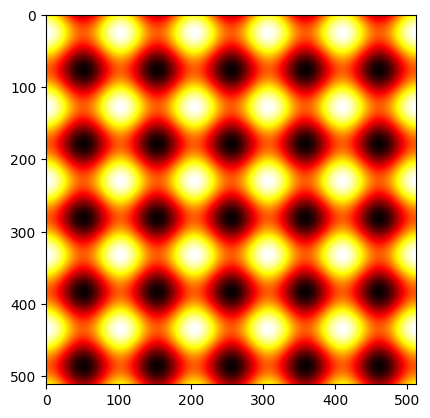

In [9]:
# Thus we can simply do
paint()

plt.imshow(img.to_numpy(), cmap='hot')
plt.show()

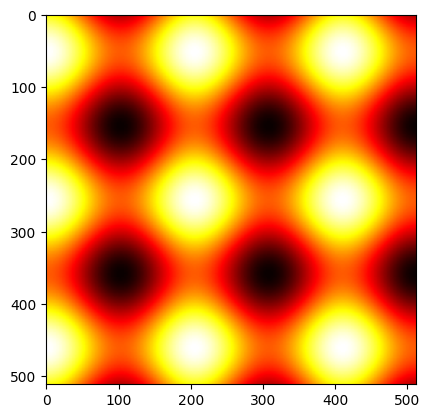

In [10]:
# Visualize the image
magnify()

plt.imshow(img_magnified.to_numpy(), cmap='hot')
plt.show()